In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks
import ImageView as imv

Tree_00032   = '..\hdr-bilder\Tree\Tree_00032.png'
Balls_00032  = '..\hdr-bilder\Balls\Balls_00032.png'

def glattingBW(fil):
    orig_image = imageio.imread(fil)
    BW = np.sum(orig_image.astype(float),2)/(3*255)           #gråtone
    image = imageio.imread(fil)
    
    image = np.sum(image.astype(float),2)/(3*255)             #gråtone
    image = image + .05 * np.random.randn(* np.shape(image))  #legg på tilfeldig støy
    image[image < 0] = 0                                      #klipp til lovlige verdier
    image[image > 1] = 1
    
    image = eks.eksplisitt(image, n = 8)

    imv.viewBW(orig_image, BW, image, "Glatting") #Displayer bildene ved siden av hverandre

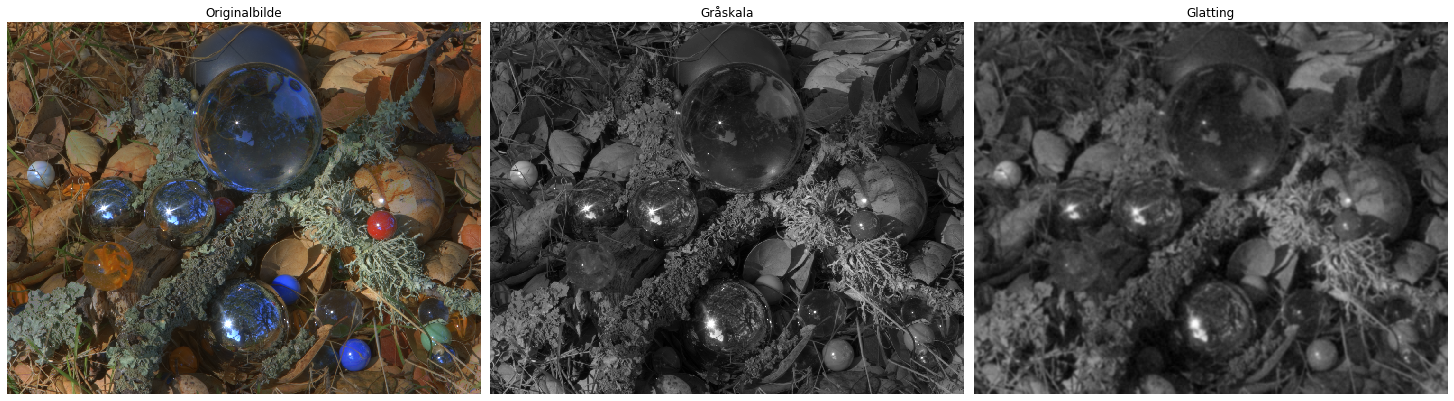

In [6]:
glattingBW(Balls_00032)

In [ ]:
glattingBW(Tree_00032)